In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import SVG
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_auc_score, plot_roc_curve
import matplotlib.pyplot as plt


# TODO: GridSearchCV 
- 가지치기(모델 복잡도 관련 규제) 파라미터 찾기
- max_depth, max_leaf_nodes, min_samples_leaf 최적의 조합을 GridSearch를 이용해 찾아본다.
- best_estimator_ 를 이용해서 feature 중요도를 조회한다.
- best_estimator_를 이용해 graphviz로 구조를 확인한다.

In [3]:
wine = pd.read_csv('data/wine.csv')
wine.shape

(6497, 13)

In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  color                 6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,C,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,C,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,C,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,B,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,C,1


In [6]:
wine['color'].value_counts()

0    4898
1    1599
Name: color, dtype: int64

In [7]:
wine['color'].value_counts()/len(wine)

0    0.753886
1    0.246114
Name: color, dtype: float64

##### 데이터셋 분리 및 전처리

In [12]:
y = wine['color']
X = wine.drop(labels='color', axis=1)

##### 전처리
- 범주형 타입인 **quality**에 대해 Label Encoding 처리

In [22]:
encoder = LabelEncoder()
X['quality'] = encoder.fit_transform(X['quality'])

print(encoder.classes_)

[0 1 2]


##### train/test set 분리

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,
                                                   random_state=0)

##### DecisionTreeClassifier 생성 ,학습, 추론

In [24]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)
proba_train = tree.predict_proba(X_train)[:, 1]
proba_test = tree.predict_proba(X_test)[:, 1]

##### Graphviz를 이용해 tree구조 시각화

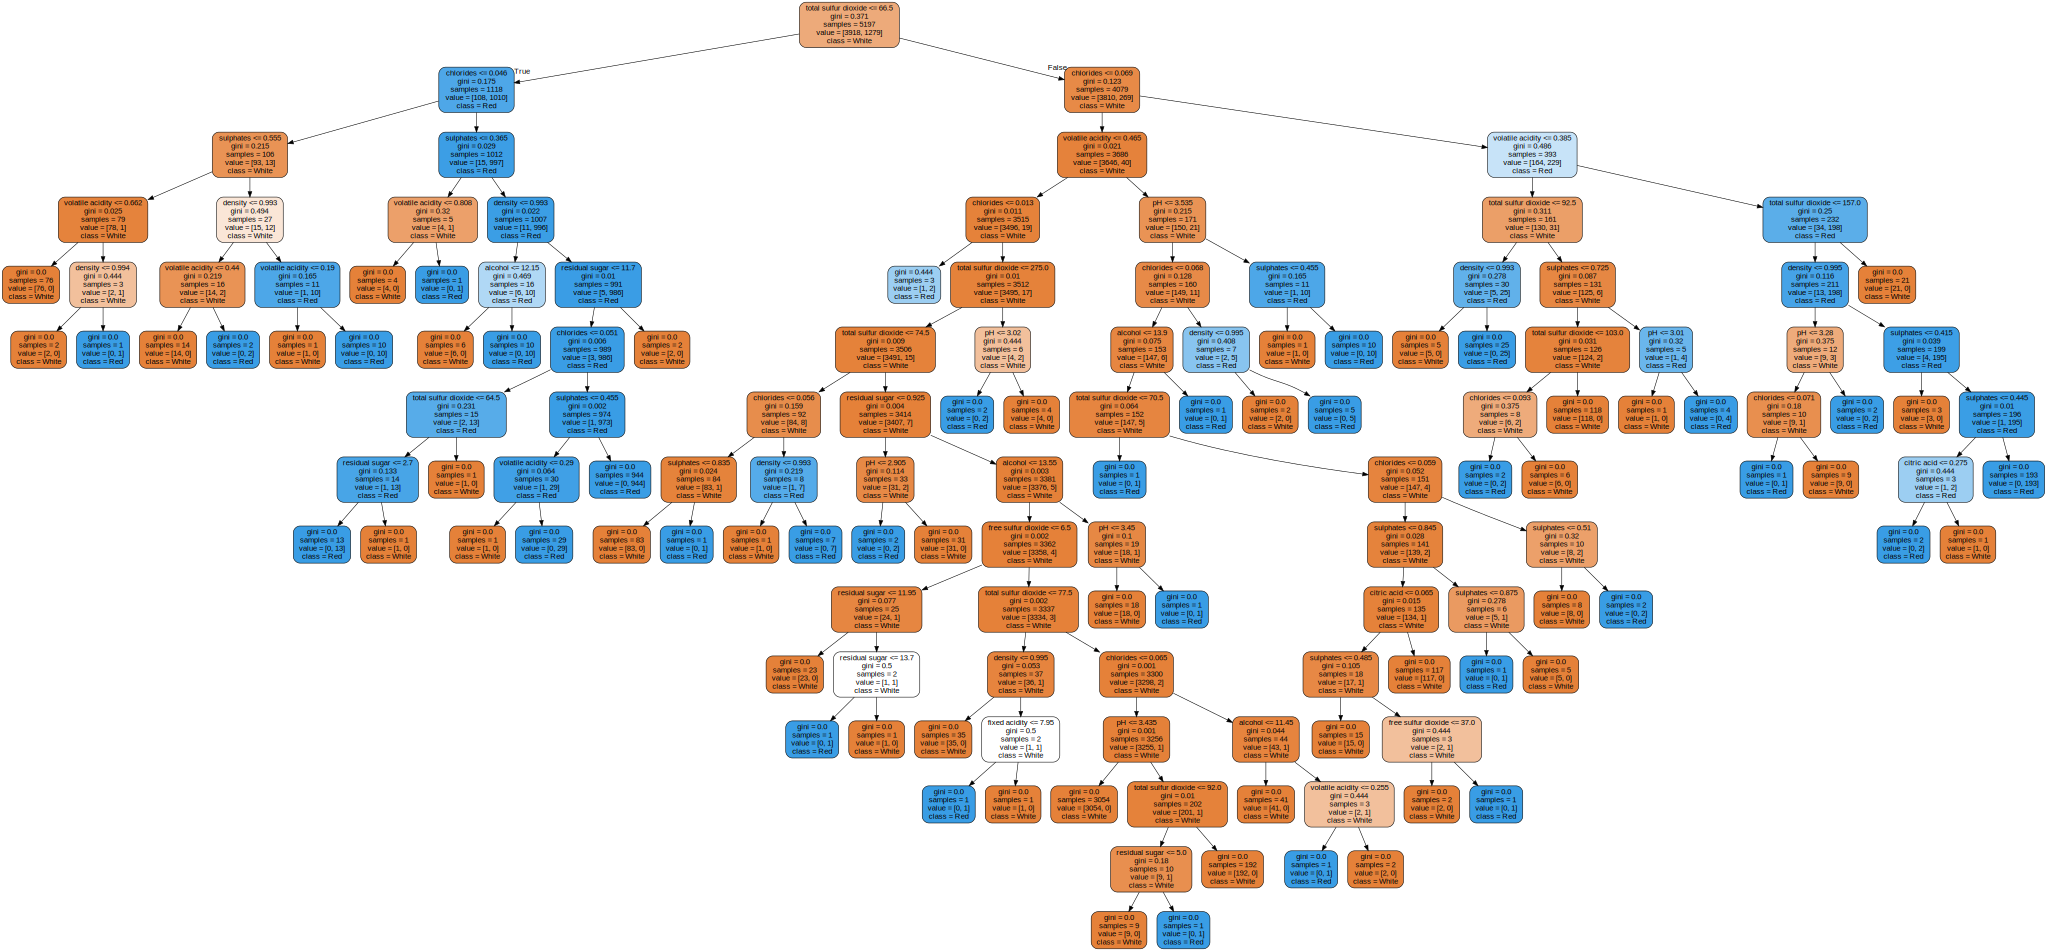

In [26]:
from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import SVG
graph = Source(export_graphviz(tree, 
                               out_file=None, 
                               feature_names=X.columns, 
                               class_names=['White', 'Red'], 
                               rounded=True,   # 모양
                               filled=True))

graph

In [27]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

confusion_matrix(y_train, pred_train)

array([[3917,    1],
       [   0, 1279]], dtype=int64)

In [28]:
confusion_matrix(y_test, pred_test)

array([[972,   8],
       [ 11, 309]], dtype=int64)

In [29]:
print('정확도')
accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)

정확도


(0.9998075812969021, 0.9853846153846154)

In [30]:
from sklearn.metrics import roc_auc_score, plot_roc_curve

print("roc-auc score")
roc_auc_score(y_train, proba_train), roc_auc_score(y_test, proba_test)

roc-auc score


(0.9999998004438926, 0.9787308673469388)

C:\Users\user\.conda\envs\ml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\user\.conda\envs\ml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


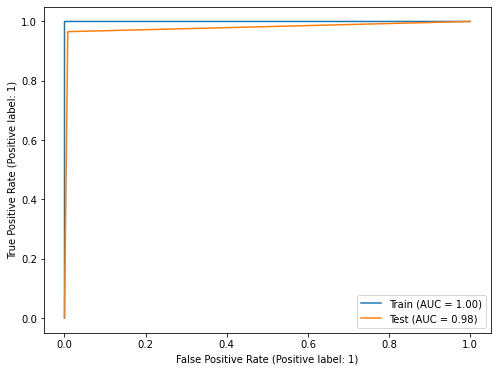

In [31]:
import matplotlib.pyplot as plt
_, ax = plt.subplots(1,1,figsize=(8,6))
plot_roc_curve(tree, X_train, y_train, ax=ax, name='Train')
plot_roc_curve(tree, X_test, y_test, ax=ax, name='Test')
plt.show()

In [32]:
fi = tree.feature_importances_
fi.shape 

(12,)

In [33]:
fi_s = pd.Series(fi, index=X.columns)

In [34]:
fi_s.sort_values()

quality                 0.000000
fixed acidity           0.000519
free sulfur dioxide     0.000731
citric acid             0.000742
residual sugar          0.005071
alcohol                 0.005230
pH                      0.014096
sulphates               0.018520
density                 0.020551
volatile acidity        0.051034
chlorides               0.207897
total sulfur dioxide    0.675608
dtype: float64

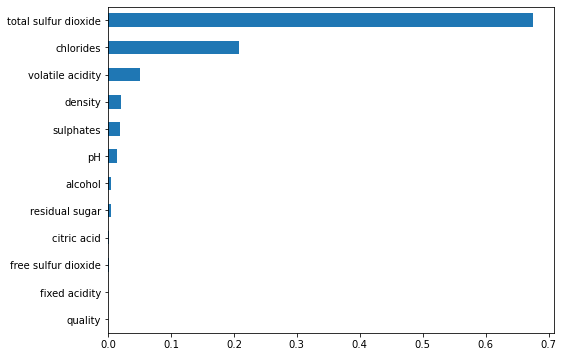

In [35]:
import matplotlib.pyplot as plt
fi_s.sort_values().plot(kind='barh', figsize=(8,6))
plt.show()

In [36]:
from sklearn.model_selection import GridSearchCV

param = {
    "max_depth": range(1,14),
    "max_leaf_nodes": [5,10,15,20,30],
    "min_samples_leaf": range(100, 1001, 100)
}

gs = GridSearchCV(DecisionTreeClassifier(random_state=0),
                 param,
                 scoring='accuracy',
                 cv=5,
                 n_jobs=-1)

In [37]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 14),
                         'max_leaf_nodes': [5, 10, 15, 20, 30],
                         'min_samples_leaf': range(100, 1001, 100)},
             scoring='accuracy')

In [39]:
gs.best_params_

{'max_depth': 3, 'max_leaf_nodes': 5, 'min_samples_leaf': 100}

In [40]:
gs.best_score_

0.9709432146294514

In [46]:
fi = gs.best_estimator_.feature_importances_   # Decision Tree 객체의 속성을 이용해 조회
fi

array([0.        , 0.04916186, 0.        , 0.        , 0.22206016,
       0.        , 0.72877798, 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [47]:
pd.Series(fi, index=X.columns).sort_values(ascending=False)

total sulfur dioxide    0.728778
chlorides               0.222060
volatile acidity        0.049162
fixed acidity           0.000000
citric acid             0.000000
residual sugar          0.000000
free sulfur dioxide     0.000000
density                 0.000000
pH                      0.000000
sulphates               0.000000
alcohol                 0.000000
quality                 0.000000
dtype: float64

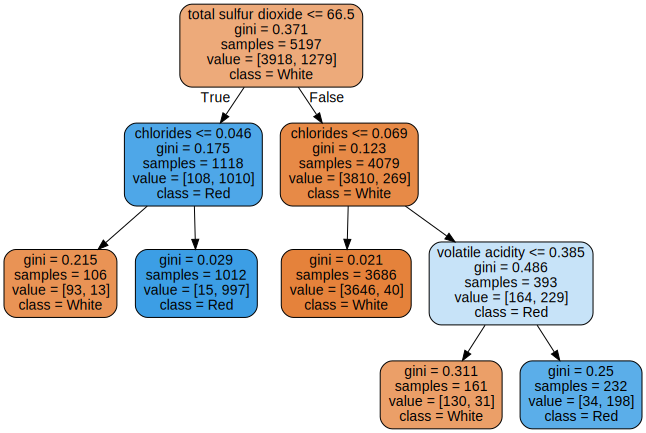

In [50]:
graph = Source(export_graphviz(gs.best_estimator_,
                              feature_names=X.columns,
                              class_names=['White', 'Red'],
                              filled=True, rounded=True))
graph